In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#managing warnings(ignoring them mostly)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)     
warnings.filterwarnings('ignore')

#setting display options
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (25, 14)
plt.style.use('seaborn-whitegrid')
   

# Introduction to The Project

Thbrief of this project states that we must focus on the comparison of one irish agricultural sector to similar sectors worldwide. To begin with we will simply start by using data from FAOSTAT to compare the production of dairy products in ireland and other EU countries, after which we will extend our analysis to other countries around the world, such as USA or NZ. A handful of machine learning techniques will be used to make predictions regarding the milk production in these countries, most likely in the units of L/Hectare or L/cow. Throughout this project we will include sentiment analysts so that we may determine if changes in public sentiment reflect the currrent ,arket conditions.

### Importing the Datasets

In [2]:
# importinjg the land data
land_df = pd.read_csv(r'C:\Users\faela\OneDrive\Documents\GitHub\MSc-Data-Analytics\CA_2\FAOSTAT_LAND_DATA.csv', on_bad_lines='skip')

# importing dairy products data
dairy_df = pd.read_csv(r'C:\Users\faela\OneDrive\Documents\GitHub\MSc-Data-Analytics\CA_2\FAOSTAT_DAIRY_DATA.csv', on_bad_lines='skip')



### First we will begin by digging into the land data a little bit so that we may gain a better understanding of the dataset

In [3]:
dairy_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,7000.0,I,Imputed value
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,7000.0,I,Imputed value
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,8000.0,I,Imputed value
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,8000.0,I,Imputed value
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,9000.0,I,Imputed value


Okay, it looks like there are some years where the values for dairy products were not recorded. We could impute these, however this may cause bias to appear in the data 

In [4]:
#find unique of dairy items in the dataset, and filter only the ones we want to see
print(dairy_df['Item'].unique())
items = ['Raw milk of cattle']

['Butter of cow milk' 'Cattle' 'Raw milk of cattle' 'Skim milk of cows'
 'Cheese from whole cow milk' 'Cheese from skimmed cow milk'
 'Skim milk and whey powder' 'Buttermilk, dry']


In [5]:
# what are the uniquwe year values?
dairy_df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

I only want eu countries here. so i will create a list of country names and then filter the land_df dataframe by these

In [6]:
#filtering the data to only include the EU member states and items of interest
from countrygroups import EUROPEAN_UNION

milk_eu = dairy_df[(dairy_df['Area'].isin(EUROPEAN_UNION.names)) & (dairy_df['Item'].isin(items)) & (dairy_df['Unit'] == 'tonnes')]
milk_eu

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
3349,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1961,1961,tonnes,2901500.0,A,Official figure
3350,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1962,1962,tonnes,3004900.0,A,Official figure
3351,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1963,1963,tonnes,3049200.0,A,Official figure
3352,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1964,1964,tonnes,3127600.0,A,Official figure
3353,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1965,1965,tonnes,3209200.0,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56226,QCL,Crops and livestock products,752,Sweden,5510,Production,2211.0,Raw milk of cattle,2016,2016,tonnes,2862000.0,A,Official figure
56227,QCL,Crops and livestock products,752,Sweden,5510,Production,2211.0,Raw milk of cattle,2017,2017,tonnes,2816660.0,A,Official figure
56228,QCL,Crops and livestock products,752,Sweden,5510,Production,2211.0,Raw milk of cattle,2018,2018,tonnes,2760230.0,A,Official figure
56229,QCL,Crops and livestock products,752,Sweden,5510,Production,2211.0,Raw milk of cattle,2019,2019,tonnes,2704390.0,A,Official figure


Now that we have the data mostly in the format, and including only the features that we want, we are able to visualise the milk yield in tonnes per country.

In [7]:
#converting country name to country code
import pycountry
def country_name_to_country_code(country_name):
    country_code = pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    return country_code

#now applying this to the data
milk_eu['Country Code'] = milk_eu['Area'].apply(country_name_to_country_code)
milk_eu.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Country Code
3349,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1961,1961,tonnes,2901500.0,A,Official figure,AUT
3350,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1962,1962,tonnes,3004900.0,A,Official figure,AUT
3351,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1963,1963,tonnes,3049200.0,A,Official figure,AUT
3352,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1964,1964,tonnes,3127600.0,A,Official figure,AUT
3353,QCL,Crops and livestock products,40,Austria,5510,Production,2211.0,Raw milk of cattle,1965,1965,tonnes,3209200.0,A,Official figure,AUT


Now that the dataset contains only thye values that we are interested in working with, we can check for obvious issues. 

In [8]:
#checking for null values
milk_eu.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Country Code        0
dtype: int64

In [9]:
milk_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 3349 to 56230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1323 non-null   object 
 1   Domain            1323 non-null   object 
 2   Area Code (M49)   1323 non-null   int64  
 3   Area              1323 non-null   object 
 4   Element Code      1323 non-null   int64  
 5   Element           1323 non-null   object 
 6   Item Code (CPC)   1323 non-null   float64
 7   Item              1323 non-null   object 
 8   Year Code         1323 non-null   int64  
 9   Year              1323 non-null   int64  
 10  Unit              1323 non-null   object 
 11  Value             1323 non-null   float64
 12  Flag              1323 non-null   object 
 13  Flag Description  1323 non-null   object 
 14  Country Code      1323 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 165.4+ KB


In [10]:
milk_eu.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,1323.000000,1323.0,1323.0,1323.000000,1323.000000,1.323000e+03
mean,391.397581,5510.0,2211.0,1993.495087,1993.495087,5.856538e+06
std,208.670837,0.0,0.0,17.231377,17.231377,7.677002e+06
min,40.000000,5510.0,2211.0,1961.000000,1961.000000,1.126700e+04
25%,233.000000,5510.0,2211.0,1979.000000,1979.000000,8.902650e+05
50%,372.000000,5510.0,2211.0,1996.000000,1996.000000,3.075600e+06
75%,616.000000,5510.0,2211.0,2008.000000,2008.000000,6.187800e+06
max,752.000000,5510.0,2211.0,2020.000000,2020.000000,3.453850e+07


In [18]:
#I want to check if there are any years missing form the dataset. I will not try to fill in the missing values, but I just
#need to know for planning purposes
#to do this we will just loop over every country and return the list of the coprresponding numbero of years. 
#there should be 60 years for each country
for i in milk_eu['Area'].unique():
    print(i, len(milk_eu[milk_eu['Area'] == i]['Year'].unique()))

Austria 60
Belgium 21
Bulgaria 60
Croatia 29
Cyprus 60
Czechia 28
Denmark 60
Estonia 29
Finland 60
France 60
Germany 60
Greece 60
Hungary 60
Ireland 60
Italy 60
Latvia 29
Lithuania 29
Luxembourg 21
Malta 60
Netherlands 60
Poland 60
Portugal 60
Romania 60
Slovakia 28
Slovenia 29
Spain 60
Sweden 60


Above show the number of rccords for each country. There are 9 countries that are missing approximately half of the number of reccords found in others. This could be due to one of two reasons...
1) The countries are quite young and simply did not exist for earlier recordings
2) There are simply no reccords available for the specified datesa due to clerical issues.

It will be very diffocult to faitlfully impute values of countries where it COULD be possible. so we are not going to carry out this step, this is simply because we dont need this data.

In [11]:
#plotting the data on map]
import plotly.express as px
fig = px.choropleth(milk_eu, locations="Country Code", color="Value",
                    hover_name="Area", animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title_text='Milk production in the EU', geo_scope='europe', width = 1000, height = 600)
fig.show()


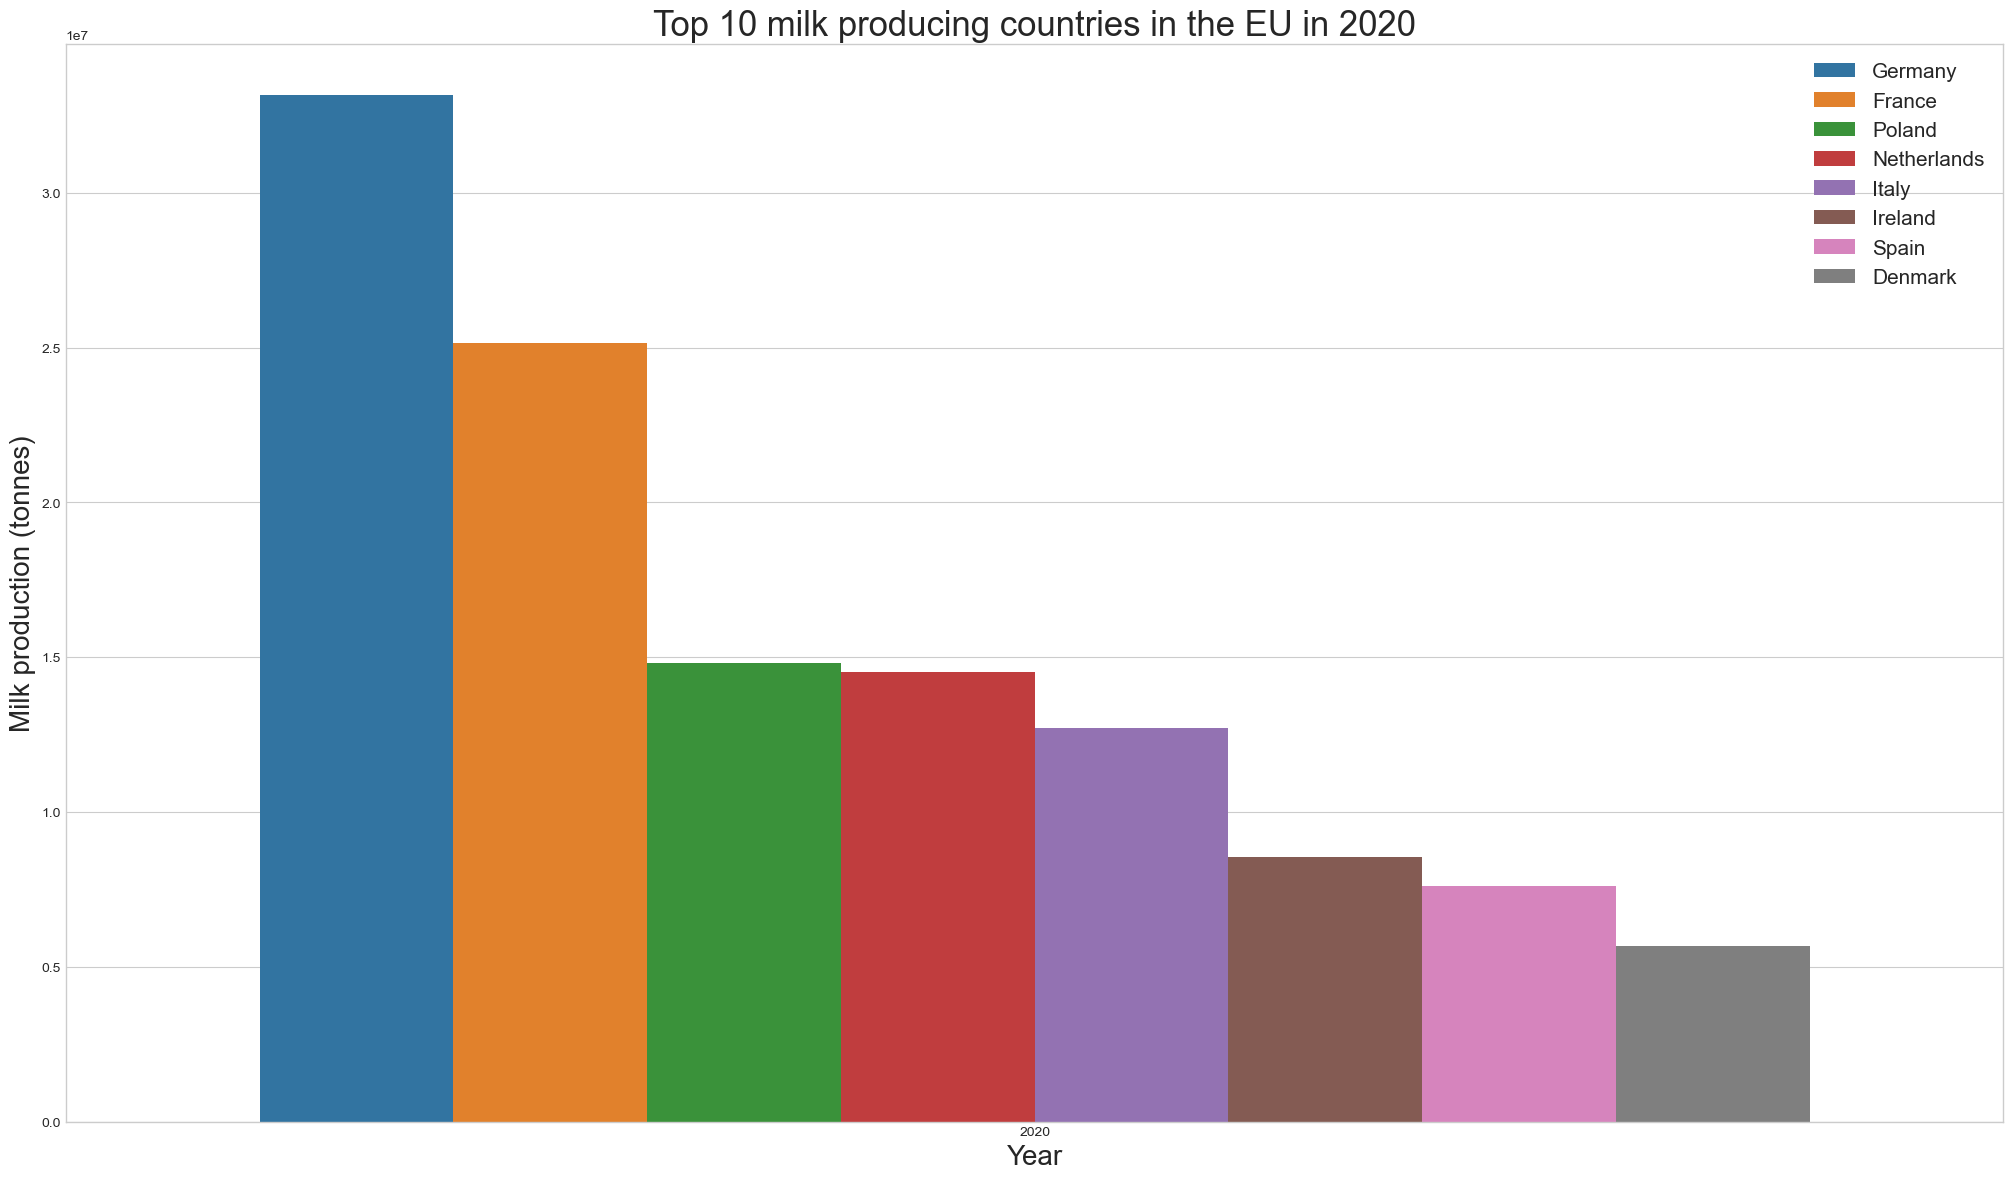

In [22]:
#this barplot is produced to show the prefoprmanxce of the top 8 milk producing countries in the EU in 2020.
#Ireland is there wohoo!
sns.barplot(x='Year', y='Value', hue='Area', data=milk_eu[milk_eu['Year'] == 2020].nlargest(8, 'Value'))
plt.title('Top 10 milk producing countries in the EU in 2020', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Milk production (tonnes)', fontsize=20)
plt.legend(loc='upper right', fontsize=15)

### Plotting the change in milk procuction for these countries over all recorded time

To do this we will use a for loop. This requires that we make a list of the top ranking countries & a list for each year that we investigate. We will then use a for loop to iterate over these countrues, querying the production values for every year of each. An if statement is added as a perecautionm to ensure that muliiple values arenjt being appended to the milk_volume list at a time. These are then plot directly from the loop, but we also save them to a dictionary incase they are needed later on in the project.

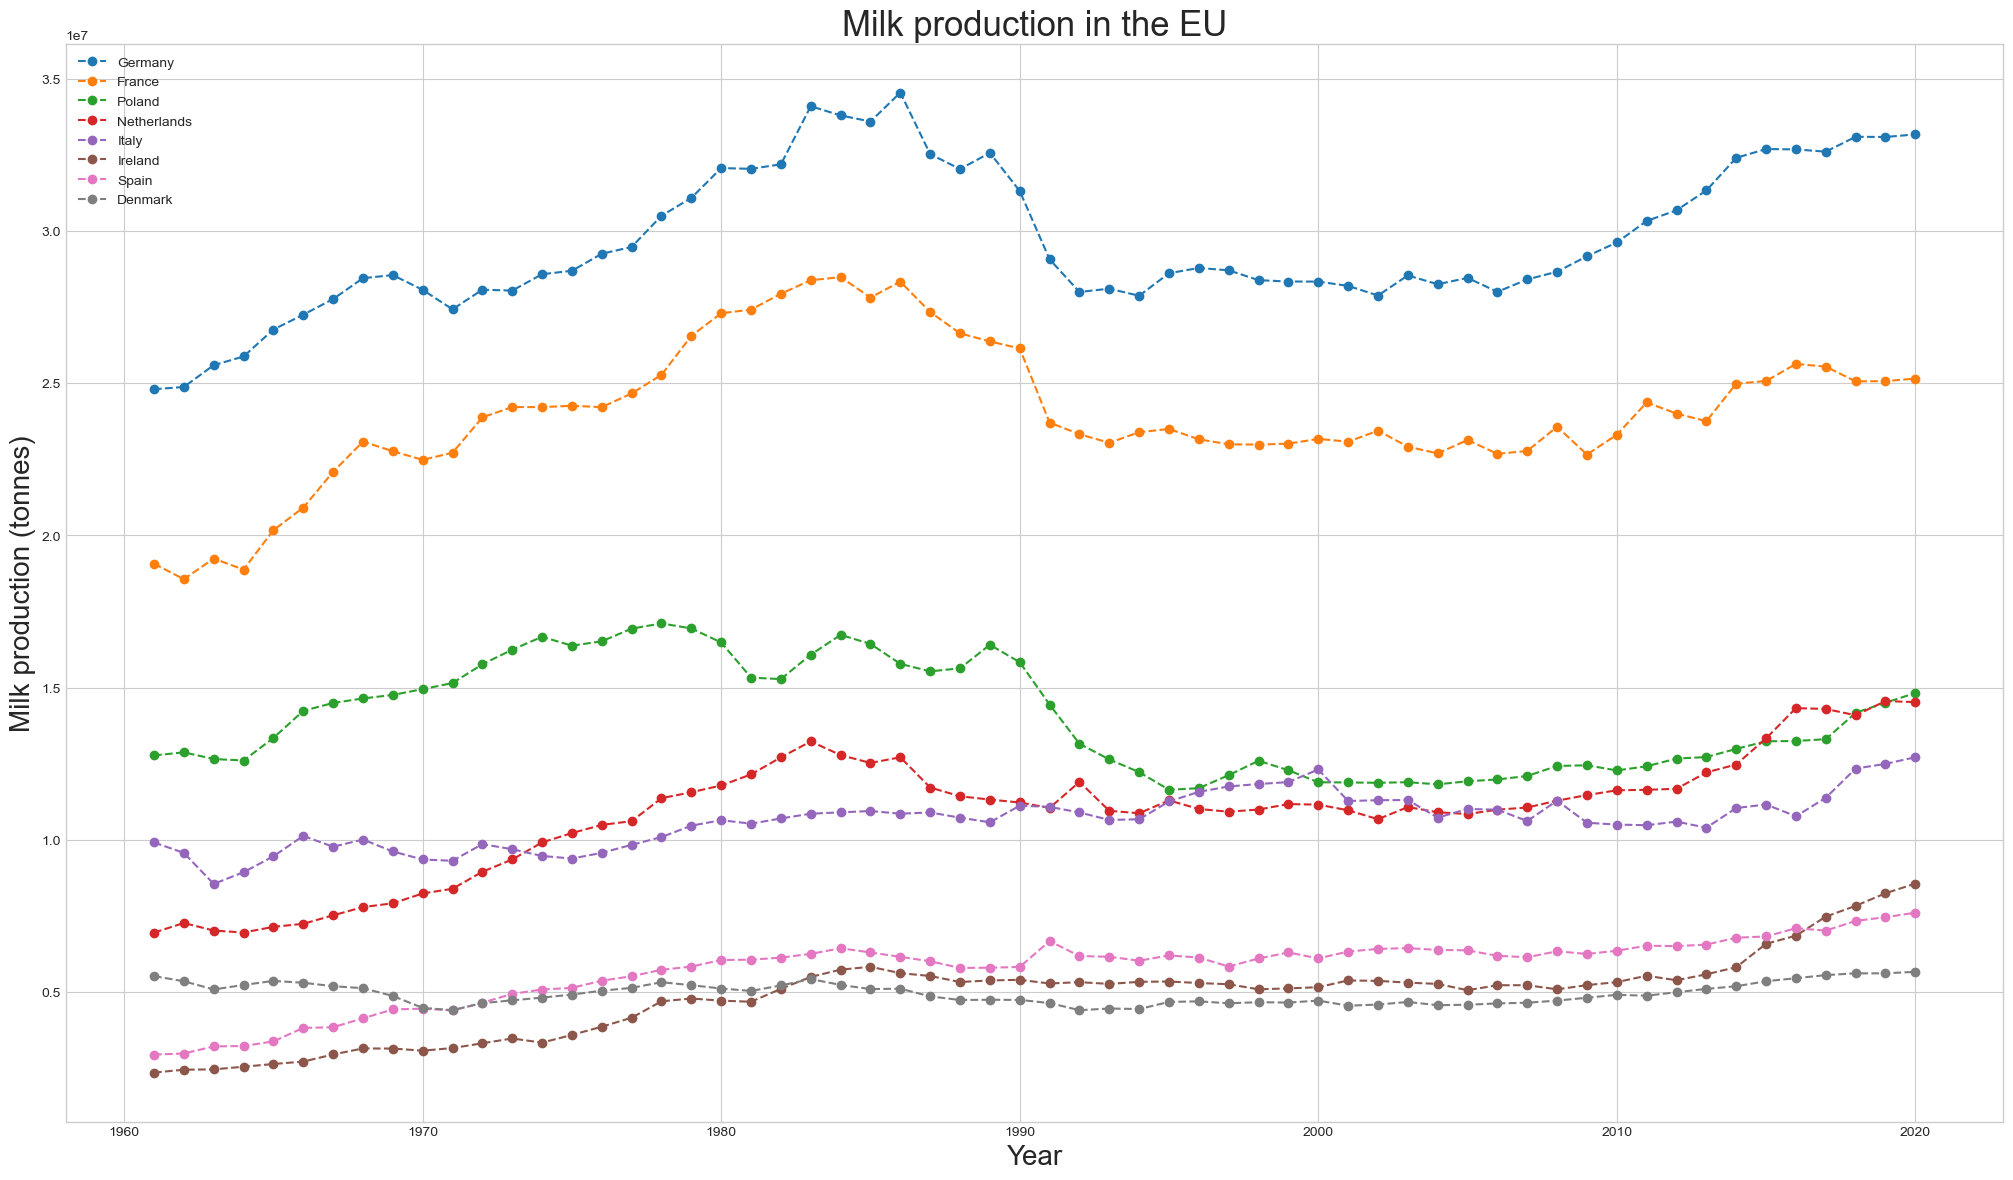

In [13]:
#creating list of countries and years
countries = milk_eu[milk_eu['Year'] == 2020].nlargest(8, 'Value')['Area'].tolist()
years = milk_eu['Year'].unique().tolist()

#defining a dictionary to store the data
milk = {}
#looping through the countries and years to get the data
for i in countries:
    milk_volume = [] #creating a list to store the data
    for j in years: 
        value = milk_eu[(milk_eu['Area'] == i) & (milk_eu['Year'] == j)]['Value']  #getting the value
        if len(value) ==1:#checking if the value is present and length is 1
            milk_volume.append(value)
        else:
            print(f'Error for', {i}, 'in', {j})#if not present, print error
    milk[i] = milk_volume #adding the data to the dictionary
    plt.plot(years, milk_volume, '--o', label=i)#plotting the data

#styling the plot
plt.legend()
plt.title('Milk production in the EU', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Milk production (tonnes)', fontsize=20)

plt.show()